In [1]:
from pathlib import Path
from itertools import chain
from collections import Counter
import youtokentome as yttm
import matplotlib.pyplot as plt

In [85]:
yttm.BPE.train(data='/home/kris/data/text/sent-grams/splits/uniform/bigrams/large/train.txt', vocab_size=2**12, model='model.p')

In [86]:
bpe = yttm.BPE(model='model.p')

In [87]:
lines = Path('/home/kris/data/text/sent-grams/splits/uniform/bigrams/large/train.txt').read_text().split('\n')

In [88]:
encoded = bpe.encode(lines)

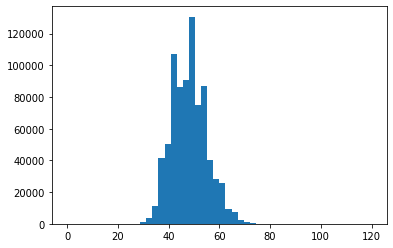

In [89]:
plt.hist(list(map(len, encoded)), bins=50, range=(0, 120))
plt.show()

In [7]:
counter = Counter(chain.from_iterable(encoded))

<BarContainer object of 1020 artists>

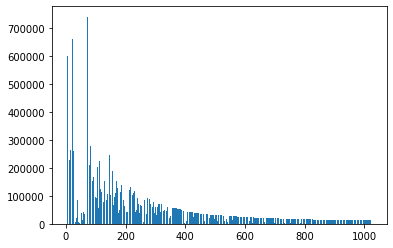

In [8]:
plt.bar(counter.keys(), counter.values())

In [18]:
max(map(len, encoded))

126

In [16]:
bpe.decode(encoded[:1])

['Da bin ich aus Versehen inmitten einer Fangruppe mit dem Zug am Stadion angekommen. Die Einheimischen haben uns mit Leuchtkugeln beschossen und mit Steinen die Scheiben im Zug eingeschmissen.']

In [4]:
folder = Path('/home/kris/data/text/sent-grams/splits/uniform/bigrams/large')
target_folder = Path('/home/kris/data/text/sent-grams/splits/uniform/bigrams/large-lowercased')

In [6]:
for filename in folder.glob('*.txt'):
    print(filename)
    new_filename = target_folder / filename.name
    new_filename.write_text(filename.read_text().lower())

/home/kris/data/text/sent-grams/splits/uniform/bigrams/large/train.txt
/home/kris/data/text/sent-grams/splits/uniform/bigrams/large/test.txt
/home/kris/data/text/sent-grams/splits/uniform/bigrams/large/val.txt


In [90]:
yttm.BPE.train(data='/home/kris/data/text/sent-grams/splits/uniform/bigrams/large-lowercased/train.txt', vocab_size=2**12, model='model-lowercased.p')

In [91]:
bpe = yttm.BPE(model='model-lowercased.p')

In [92]:
lines = Path('/home/kris/data/text/sent-grams/splits/uniform/bigrams/large-lowercased/train.txt').read_text().split('\n')

In [93]:
encoded = bpe.encode(lines)

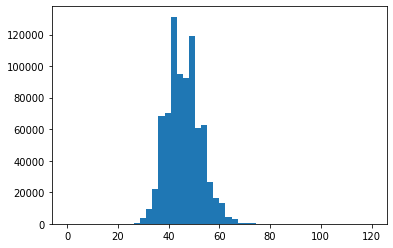

In [94]:
plt.hist(list(map(len, encoded)), bins=50, range=(0, 120))
plt.show()